In [27]:
# import necessary modulus for manipulation
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import urlib.requesst to open URLs
from urllib.request import urlopen 

#import Beautiful Soup package to extract data from html fles
from bs4 import BeautifulSoup
import re

#import necessary modules for data visualization
from pylab import rcParams
import seaborn as sns, numpy as np

In [28]:
#passing url to urlopen
url="https://www.hubertiming.com/results/2019MLK" #open link
html = urlopen(url) 

In [29]:
#Create Beautiful Soup object by passing the html to the BeautifulSoup() finction to parse html
soup = BeautifulSoup(html)

In [30]:
#interate row and parse cell data in
data = []
allrows= soup.find_all("tr")
for row in allrows :
    row_list = row.find_all("td")
    dataRow= []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
  
data = data[6:] 

In [31]:
#Check the data header to see if this is the what we want 
header_list = []
col_headers = soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Time', 'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [32]:
#Use pandas to make data frame
df = pd.DataFrame(data)

In [33]:
#Check data head and tail to ensure the dataframe is correct & remove missing data
df.columns = header_list
print(df.head())
print(df.tail())

  Place   Bib            Name Gender Age      City State Chip Time Chip Pace  \
0     1  1229  BURTON SCHABER      M  30  PORTLAND    OR     17:18      5:34   
1     2  1019  ROBERT SIMPSON      M  31  PORTLAND    OR     18:28      5:56   
2     3  1246      DAN FRANEK      M  53  PORTLAND    OR     18:53      6:04   
3     4  1072       LEO CHANG      M  39  PORTLAND    OR     19:35      6:18   
4     5  1175   KARA BATDORFF      F  27  PORTLAND    OR     20:04      6:27   

  Gender Place Age Group Age Group Place Time to Start Gun Time  
0      1 of 88   M 21-39         1 of 39          0:01    17:19  
1      2 of 88   M 21-39         2 of 39          0:01    18:29  
2      3 of 88   M 40-54         1 of 23          0:00    18:53  
3      4 of 88   M 21-39         3 of 39          0:01    19:36  
4     1 of 105   F 21-39         1 of 47          0:01    20:05  
    Place   Bib                   Name Gender Age       City State Chip Time  \
196   197  1059         JASMINE MURPHY     

In [34]:
#check data shape
df.shape

(201, 14)

In [35]:
#check data and drop na data
df2 = df.dropna(how='any')
df.shape

(201, 14)

In [36]:
#add one column of Year since wanting to get 2014 to 2019, year os am index
df2['Year'] = 2019

In [37]:
#Add the hours if it is not missing h:m:s is the starndard formate in time
df2['Chip Time'] = df2['Chip Time'].apply(lambda x : x.rjust(5, '0').rjust(6, ':').rjust(8, '0'))
df2['ChipTime_minutes'] = df['Chip Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [38]:
#after formating time in h:m:s then convert time into mins
time_list = df2['Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    cal = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(cal)
#print(time_mins)

In [39]:
# check if Runner_minus is added in the dataframe
df2['Runner_mins'] = time_mins
df2.head(5)

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Year,ChipTime_minutes,Runner_mins
0,1,1229,BURTON SCHABER,M,30,PORTLAND,OR,00:17:18,5:34,1 of 88,M 21-39,1 of 39,0:01,17:19,2019,1038,17.300000
1,2,1019,ROBERT SIMPSON,M,31,PORTLAND,OR,00:18:28,5:56,2 of 88,M 21-39,2 of 39,0:01,18:29,2019,1108,18.466667
2,3,1246,DAN FRANEK,M,53,PORTLAND,OR,00:18:53,6:04,3 of 88,M 40-54,1 of 23,0:00,18:53,2019,1133,18.883333
3,4,1072,LEO CHANG,M,39,PORTLAND,OR,00:19:35,6:18,4 of 88,M 21-39,3 of 39,0:01,19:36,2019,1175,19.583333
4,5,1175,KARA BATDORFF,F,27,PORTLAND,OR,00:20:04,6:27,1 of 105,F 21-39,1 of 47,0:01,20:05,2019,1204,20.066667


Text(0.5, 1.0, 'Comparsion of average minutes run by male and female')

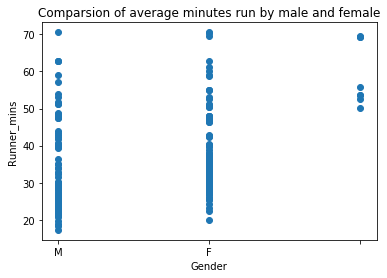

In [40]:
plt.scatter(df2['Gender'], df2['Runner_mins'])
plt.xlabel('Gender')
plt.ylabel('Runner_mins')
plt.title("Comparsion of average minutes run by male and female") 

In [41]:
df2.describe(include=[np.number])

,Year,ChipTime_minutes,Runner_mins
count,201.0,201.000000,201.000000
mean,2019.0,1964.995025,36.964594
std,0.0,775.900493,12.579913
min,2019.0,60.000000,17.300000
25%,2019.0,1555.000000,27.633333
50%,2019.0,1890.000000,33.150000
75%,2019.0,2429.000000,46.283333
max,2019.0,3541.000000,70.550000


Text(0, 0.5, 'Run time')

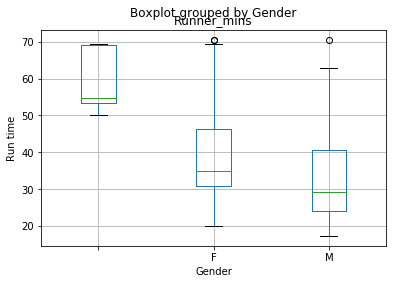

In [42]:
df2.boxplot(column='Runner_mins', by = 'Gender')
plt.ylabel('Run time')

In [43]:
df2.describe(include=[np])

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,201,201,196,3,55,15,4,180,156,201,9,201,37,174
top,200,1271,UNKNOWN RUNNER SEE TIMER,F,,PORTLAND,OR,00:27:08,17:43,98 of 105,F 21-39,5 of 47,0:04,29:05
freq,1,1,6,105,16,124,141,3,3,1,47,1,12,3


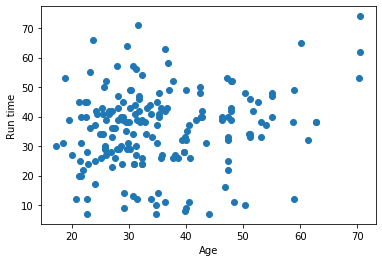

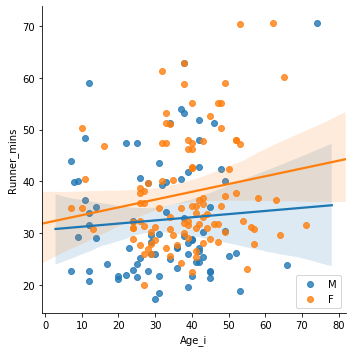

In [44]:
import seaborn as sns, numpy as np
df2['Age_i'] = round(pd.to_numeric(df2['Age'], errors='coerce'))
df2.dropna(how ='any', inplace = True)
df = plt.scatter(df2['Runner_mins'], df2['Age_i'])
df = plt.ylabel('Run time')
df= plt.xlabel('Age')
df = plt.show()

sns.lmplot( x='Age_i', y='Runner_mins', data=df2, fit_reg=True, hue='Gender', legend=False)
plt.legend(loc='lower right')


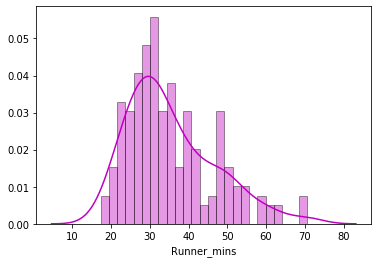

In [45]:
import seaborn as sns, numpy as np
x = df2['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

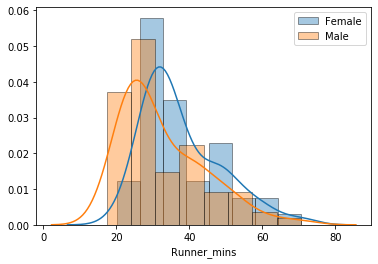

In [46]:
f_runner = df2.loc[df2['Gender']=='F']['Runner_mins']
m_runner = df2.loc[df2['Gender']=='M']['Runner_mins']
sns.distplot(f_runner, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_runner, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [47]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [48]:
g_stats = df2.groupby("Gender", as_index=True).describe()
print(g_stats)

         Year                                                       \
        count    mean  std     min     25%     50%     75%     max   
Gender                                                               
F       104.0  2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0   
M        81.0  2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0   

       ChipTime_minutes               ... Runner_mins             Age_i  \
                  count         mean  ...         75%        max  count   
Gender                                ...                                 
F                 104.0  2081.105769  ...   46.270833  70.533333  104.0   
M                  81.0  1858.172840  ...   39.983333  70.550000   81.0   

                                                            
             mean        std  min   25%   50%    75%   max  
Gender                                                      
F       38.528846  12.310668  7.0  30.0  39.0  46.25  71.0  
M       32.074074  13.683729 

Text(0, 0.5, 'Run time')

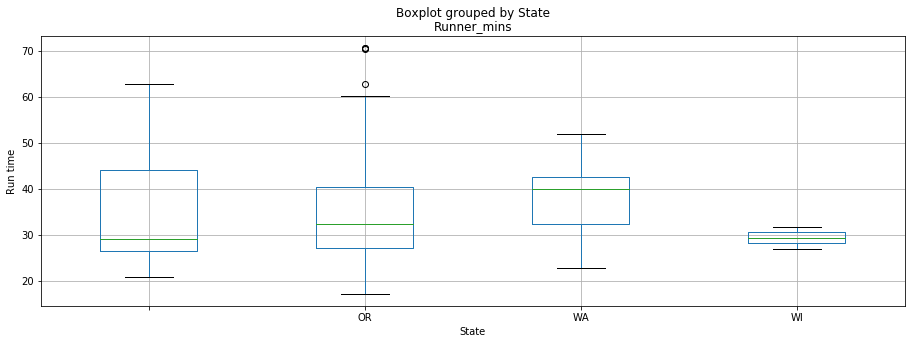

In [49]:
df2.boxplot(column='Runner_mins', by = 'State')
plt.ylabel('Run time')

Text(0, 0.5, 'Run time')

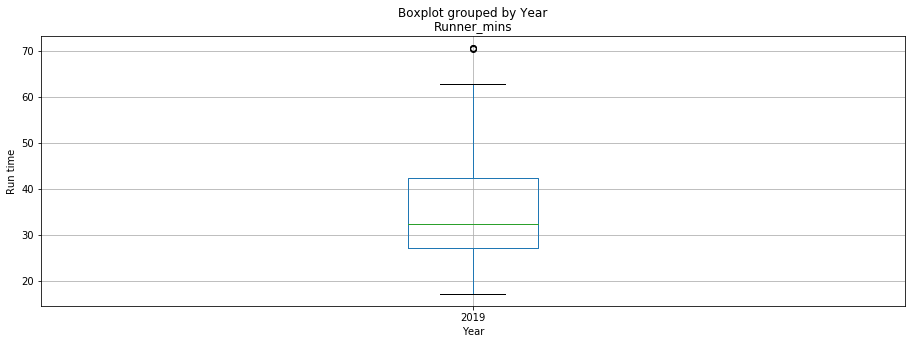

In [50]:
df2.boxplot(column='Runner_mins', by = 'Year')
plt.ylabel('Run time')

In [51]:
g_stats = df2.groupby("Age Group", as_index=True).describe()
print(g_stats)

                Year                                                       \
               count    mean  std     min     25%     50%     75%     max   
Age Group                                                                   
F 20 and Under   6.0  2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0   
F 21-39         47.0  2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0   
F 40-54         41.0  2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0   
F 55+           10.0  2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0   
M 20 and Under  17.0  2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0   
M 21-39         39.0  2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0   
M 40-54         23.0  2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0   
M 55+            2.0  2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0   

               ChipTime_minutes               ... Runner_mins             \
                          count         mean  ...         75%        max   


In [52]:
#Write to CSV
df2.to_csv('final2019.csv')